In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
cs = pd.read_csv("customer_status.csv")
mr = pd.read_csv("meeting_reports.csv")

For the given task customers' data who didn't have a meeting with representative is not needed, so left join will be used to merge data

In [231]:
md = cs.merge(mr, on="customer id", how="right")

In [232]:
md.rename(columns = {'customer id':'id', 'created_at':'created', 'subscription_started':'subscription','Meeting Date':'meeting'}, inplace = True)

In [234]:
md[["created", "subscription","meeting"]] = md[["created", "subscription","meeting"]].apply(pd.to_datetime)

Checking in which lifecycle user had a meeting with representative

In [235]:
def check_lc(df):
    if(df['meeting'] <= df['created']):
        return 'before creating an account'
    elif(pd.isnull(df['subscription'])):
        return 'after creating an account(non-subscribers)'
    elif(df['meeting'] <= df['subscription']):
        return 'between creating an account and subscription'
    else:
        return 'after subscription'

In [236]:
md['lifecycle']=md.apply(check_lc, axis = 1)

In [237]:
md['lifecycle'].value_counts()

before creating an account                      318
after creating an account(non-subscribers)      250
after subscription                              138
between creating an account and subscription     46
Name: lifecycle, dtype: int64

In [238]:
md['subscription'].count()

269

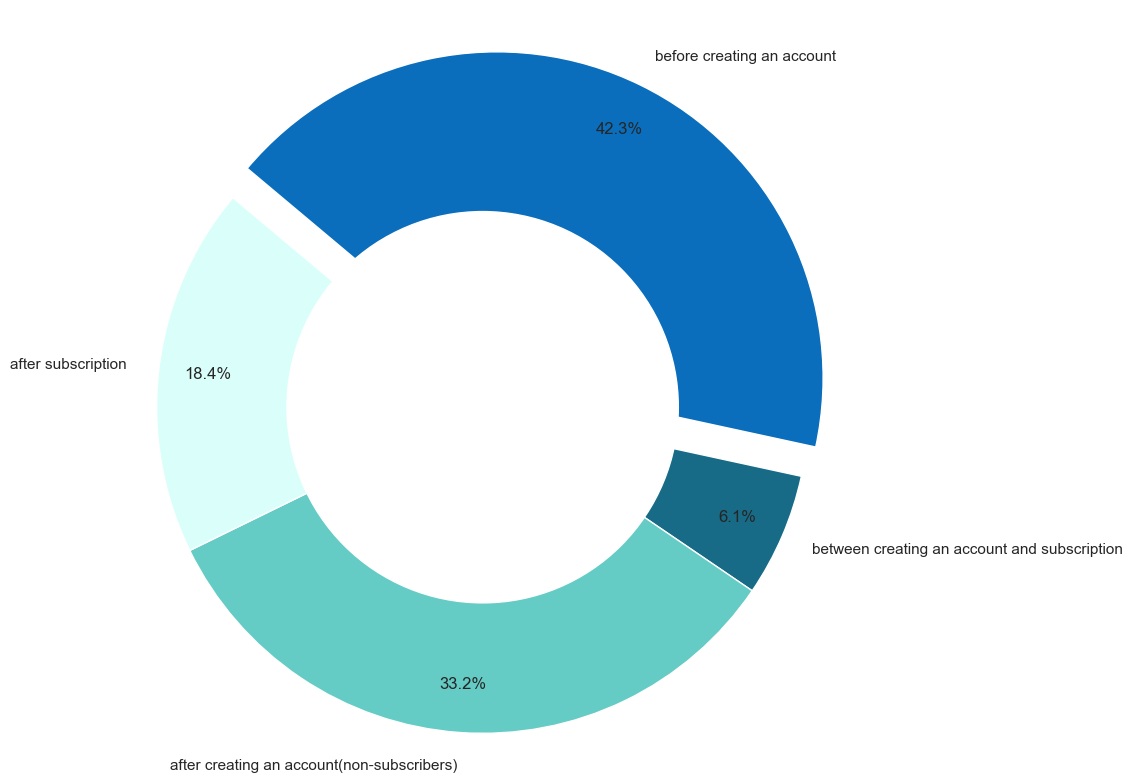

In [239]:
time_periods = md['lifecycle'].value_counts()
time_periods = time_periods.reindex(index=['before creating an account', 'between creating an account and subscription', 'after creating an account(non-subscribers)','after subscription'])
colors = ['#0A6EBD','#176B87','#64CCC5','#DAFFFB']
explode = (0.1, 0, 0, 0)
plt.figure(figsize=(10,8))
plt.pie(time_periods, labels=time_periods.index, colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=140, counterclock=False)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')  
plt.tight_layout()
plt.show()

# Question 1

### As it seems from the pie chart above, 40% of meetings held before users created an account and 60% of meetings happened after they created an account. 18% of meetings happened after users subscribed to the service

We don't need data of users who subscribed before meeting since we want to measure performance of meetings to answer second question. So we will filter them

In [240]:
md2 = md[md['lifecycle'] != 'after subscription']

In [241]:
def check_subscription(df):
    if (pd.isnull(df['subscription'])):
        return 'no'
    else:
        return 'yes'

In [243]:
md2['subscribed']=md2.apply(check_subscription, axis = 1)

C:\Users\Ismayil\AppData\Local\Temp\ipykernel_17164\2864757077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md2['subscribed']=md2.apply(check_subscription, axis = 1)


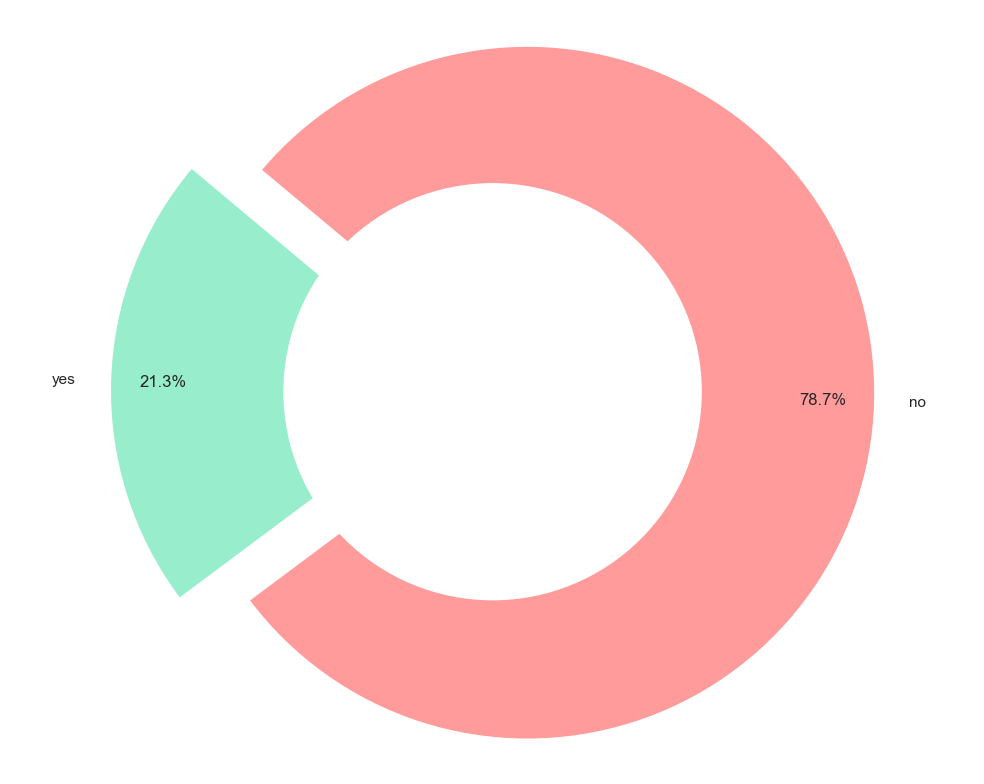

In [244]:
subscribers = md2['subscribed'].value_counts()
explode=(0.1,0.1)
colors=['#FF9B9B','#98EECC']
plt.figure(figsize=(10,8))
plt.pie(subscribers, labels=subscribers.index, colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=140, counterclock=False)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')  
plt.tight_layout()
plt.show()


# Question 2

### 20 percent of clients decided to purchase a subscription after having online meeting with representative